Found 8 collinear triples.


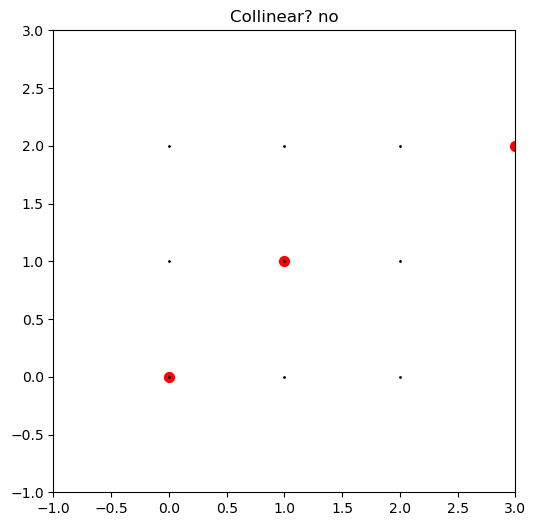

In [6]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt

@njit(parallel=True, cache=True)
def find_all_collinear_triples_numba(n):
    """
    Find all unordered collinear triples on an n×n grid.
    Returns a (T, 3, 2) array of integer coordinates.
    """
    N = n * n
    # preallocate a worst-case list; we'll count actual length later
    out = np.empty((N*(N-1)*(N-2)//6, 3, 2), dtype=np.int64)
    count = 0
    for idx in prange(N):
        i0, j0 = divmod(idx, n)
        for idx2 in range(idx+1, N):
            i1, j1 = divmod(idx2, n)
            for idx3 in range(idx2+1, N):
                i2, j2 = divmod(idx3, n)
                # inlined collinearity check: (y0−y1)*(x0−x2)==(y0−y2)*(x0−x1)
                if (j0 - j1)*(i0 - i2) == (j0 - j2)*(i0 - i1):
                    out[count, 0, 0] = i0
                    out[count, 0, 1] = j0
                    out[count, 1, 0] = i1
                    out[count, 1, 1] = j1
                    out[count, 2, 0] = i2
                    out[count, 2, 1] = j2
                    count += 1
    return out[:count]

def query_triple(triples, p1, p2, p3):
    """Check if the exact triple p1,p2,p3 is in our precomputed set."""
    # sort the three so we can do fast row‐wise comparison
    target = np.sort(np.array([p1, p2, p3]), axis=0)
    for tri in triples:
        if np.array_equal(np.sort(tri, axis=0), target):
            return 'yes'
    return 'no'

def plot_points_and_line(n, points, collinear):
    """Scatter the grid and the three points; if collinear draw the fit line."""
    xs, ys = zip(*points)
    plt.figure(figsize=(6,6))
    # plot full grid
    gx = np.arange(n)
    gy = np.arange(n)
    for x in gx:
        plt.plot([x]*n, gy, 'k.', markersize=2)
    # highlight the triple
    plt.scatter(xs, ys, s=50, c='red')
    if collinear == 'yes':
        # draw the line through the first two
        x0,y0 = points[0]
        x1,y1 = points[1]
        if x1 != x0:
            m = (y1-y0)/(x1-x0)
            b = y0 - m*x0
            xl = np.array([0, n-1])
            yl = m*xl + b
            plt.plot(xl, yl, '-', linewidth=1)
        else:
            plt.plot([x0,x0],[0,n-1], '-', linewidth=1)
    plt.xlim(-1, n)
    plt.ylim(-1, n)
    plt.title(f"Collinear? {collinear}")
    plt.gca().set_aspect('equal', 'box')
    plt.show()

if __name__ == '__main__':
    n = 3
    triples = find_all_collinear_triples_numba(n)
    print("Found", len(triples), "collinear triples.")

    # example query
    pA, pB, pC = (0,0), (1,1), (3,2)
    res = query_triple(triples, pA, pB, pC)
    plot_points_and_line(n, [pA,pB,pC], res)


In [5]:
triples

array([[[                0,                 2],
        [                1,                 1],
        [                2,                 0]],

       [[                0,                 2],
        [                1,                 2],
        [                2,                 2]],

       [[                0,                 0],
        [                1,                 1],
        [                2,                 2]],

       [[                0,                 1],
        [                1,                 1],
        [                2,                 1]],

       [[32932709721178220, 28147987304611950],
        [28147931470233701, 30399774232608800],
        [28429445101060204, 32651234744860769]],

       [[30399778527969394, 31243859861373029],
        [30962664052097134, 30963170863349792],
        [29555362187640864,  9007242207428708]],

       [[23081085531324448, 32088649863790693],
        [27303210187423854, 12385259755143200],
        [ 9007388236644384, 

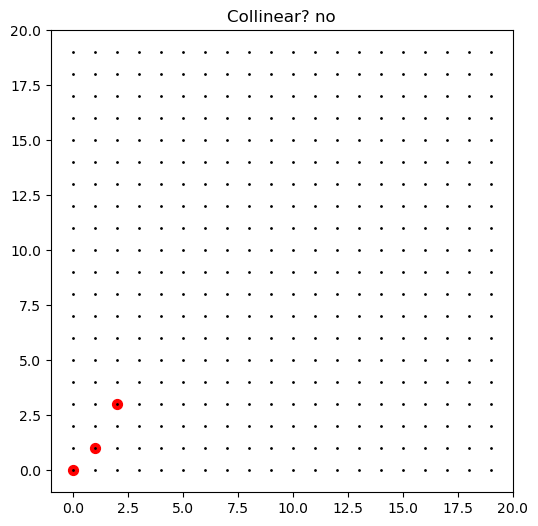

In [10]:
pA, pB, pC = (0,0), (1,1), (2,3)
res = query_triple(triples, pA, pB, pC)
plot_points_and_line(n, [pA,pB,pC], res)